In [16]:
import pandas as pd
df = pd.read_csv('./self/clean6_car_price.csv')

print(df.head())


   Unnamed: 0                                car_name  car_prices_in_rupee  \
0           0  Jeep Compass 2.0 Longitude Option BSIV                10.03   
1           1            Renault Duster RXZ Turbo CVT                12.83   
2           2                      Toyota Camry 2.5 G                16.40   
3           4        Volkswagen Polo 1.2 MPI Highline                 5.15   
4           5    Volkswagen Vento 1.2 TSI Highline AT                 7.66   

   kms_driven  fuel_type  transmission  ownership  manufacture  engine  Seats  \
0     86226.0          0             1          1       2017.0  1956.0    5.0   
1     13248.0          1             0          1       2021.0  1330.0    5.0   
2     60343.0          1             0          1       2016.0  2494.0    5.0   
3     69414.0          1             1          1       2016.0  1199.0    5.0   
4     49719.0          1             0          1       2017.0  1197.0    5.0   

     zscore  
0 -0.083515  
1  0.058409  
2 

In [17]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the dataset
df = pd.read_csv('./self/clean6_car_price.csv')

# Selecting features and target variable
X = df[['kms_driven', 'fuel_type', 'transmission', 'ownership', 'manufacture', 'engine', 'Seats']]
y = df['car_prices_in_rupee']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and training the model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Example prediction
example_features = [[80000, 0, 1, 1, 2018, 1999, 5]]
predicted_price = model.predict(example_features)
print("Predicted Price for the example car:", predicted_price)


Mean Squared Error: 8.36901201330294
Predicted Price for the example car: [7.99610602]


c:\Users\Gaurav\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [18]:
from sklearn.metrics import r2_score

# Calculating R^2 score (accuracy)
r2 = r2_score(y_test, y_pred)
print("R^2 Score (Accuracy):", r2)


R^2 Score (Accuracy): 0.5662986352800643


In [15]:
from sklearn.ensemble import RandomForestRegressor

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and training the Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Making predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluating the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print("Random Forest - Mean Squared Error:", mse_rf)
print("Random Forest - R^2 Score:", r2_rf)


Random Forest - Mean Squared Error: 7.785603185894165
Random Forest - R^2 Score: 0.5965322165241405


In [34]:
import xgboost as xgb

# Initializing and training the XGBoost model
xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

# Making predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluating the model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print("XGBoost - Mean Squared Error:", mse_xgb)
print("XGBoost - R^2 Score:", r2_xgb)


XGBoost - Mean Squared Error: 8.001222483767013
XGBoost - R^2 Score: 0.5853583308135257


In [24]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Create a pipeline with standardization and SVR
svr_model = make_pipeline(StandardScaler(), SVR())

# Train the SVR model
svr_model.fit(X_train, y_train)

# Make predictions
y_pred_svr = svr_model.predict(X_test)

# Evaluate the model
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
print("SVR - Mean Squared Error:", mse_svr)
print("SVR - R^2 Score:", r2_svr)


SVR - Mean Squared Error: 7.917252849066123
SVR - R^2 Score: 0.5897098295456249


In [25]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initializing and training the SVR model
svr_model = SVR()
svr_model.fit(X_train_scaled, y_train)

# Making predictions
y_pred_svr = svr_model.predict(X_test_scaled)

# Evaluating the model
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
print("SVR - Mean Squared Error:", mse_svr)
print("SVR - R^2 Score:", r2_svr)


SVR - Mean Squared Error: 7.917252849066123
SVR - R^2 Score: 0.5897098295456249


In [21]:
from sklearn.model_selection import GridSearchCV, KFold

# Define Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)

# Define hyperparameters grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search with 5-fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=kf, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get best parameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions
y_pred_rf_tuned = best_model.predict(X_test)

# Evaluate the model
mse_rf_tuned = mean_squared_error(y_test, y_pred_rf_tuned)
r2_rf_tuned = r2_score(y_test, y_pred_rf_tuned)
print("Random Forest (Tuned) - Mean Squared Error:", mse_rf_tuned)
print("Random Forest (Tuned) - R^2 Score:", r2_rf_tuned)


Random Forest (Tuned) - Mean Squared Error: 7.325583778132551
Random Forest (Tuned) - R^2 Score: 0.6203714755223037


In [11]:
from sklearn.ensemble import VotingRegressor

# Feature Selection using Feature Importances
feature_importances = best_model.feature_importances_
sorted_indices = feature_importances.argsort()[::-1]
selected_features = X_train.columns[sorted_indices][:5]  # Select top 5 important features

X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Initialize additional models (you can add more models here)
# For demonstration purposes, we'll use the tuned Random Forest model again
model1 = best_model

# Ensemble Methods (Voting Regressor)
ensemble_model = VotingRegressor([('rf', model1)], n_jobs=-1)
ensemble_model.fit(X_train_selected, y_train)

# Make predictions
y_pred_ensemble = ensemble_model.predict(X_test_selected)

# Evaluate the ensemble model
mse_ensemble = mean_squared_error(y_test, y_pred_ensemble)
r2_ensemble = r2_score(y_test, y_pred_ensemble)
print("Ensemble Model - Mean Squared Error:", mse_ensemble)
print("Ensemble Model - R^2 Score:", r2_ensemble)


Ensemble Model - Mean Squared Error: 7.4106959713669625
Ensemble Model - R^2 Score: 0.615960766790927


FileNotFoundError: [Errno 2] No such file or directory: 'your_dataset.csv'

In [ ]:
from sklearn.model_selection import GridSearchCV, KFold

# Define Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)

# Define hyperparameters grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search with 5-fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=kf, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get best parameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions
y_pred_rf_tuned = best_model.predict(X_test)

# Evaluate the model
mse_rf_tuned = mean_squared_error(y_test, y_pred_rf_tuned)
r2_rf_tuned = r2_score(y_test, y_pred_rf_tuned)
print("Random Forest (Tuned) - Mean Squared Error:", mse_rf_tuned)
print("Random Forest (Tuned) - R^2 Score:", r2_rf_tuned)


Random Forest (Tuned) - Mean Squared Error: 7.325583778132551
Random Forest (Tuned) - R^2 Score: 0.6203714755223037


In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, VotingRegressor

# Load your dataset
# Assuming your dataset is stored in a DataFrame called 'data'
# You may need to adjust this part based on how you load your data
data = pd.read_csv("./self/clean6_car_price.csv")

# Perform train-test split
X = data.drop(columns=["car_prices_in_rupee", "car_name",'zscore'])  # Assuming these are the features
y = data["car_prices_in_rupee"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Engineering
# You can implement your feature engineering steps here

# Hyperparameter Tuning for XGBoost
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb_model = XGBRegressor(random_state=42)
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get best parameters and best model
best_params = grid_search.best_params_
best_xgb_model = grid_search.best_estimator_

# Random Forest Regression (for Ensemble)
rf_model = RandomForestRegressor(random_state=42)

# Ensemble Methods (Voting Regressor)
ensemble_model = VotingRegressor([('xgb', best_xgb_model), ('rf', rf_model)], n_jobs=-1)
ensemble_model.fit(X_train, y_train)

# Make predictions
y_pred_ensemble = ensemble_model.predict(X_test)

# Evaluate the ensemble model
mse_ensemble = mean_squared_error(y_test, y_pred_ensemble)
r2_ensemble = r2_score(y_test, y_pred_ensemble)
print("Ensemble Model - Mean Squared Error:", mse_ensemble)
print("Ensemble Model - R^2 Score:", r2_ensemble)



Ensemble Model - Mean Squared Error: 6.679075181494375
Ensemble Model - R^2 Score: 0.6538750312848538


In [20]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv("./self/clean6_car_price.csv")

# Drop irrelevant columns (if any)
data = data.drop(columns=["Unnamed: 0"])

# Handle missing values
imputer = SimpleImputer(strategy="mean")
data[['kms_driven', 'manufacture', 'engine', 'Seats']] = imputer.fit_transform(data[['kms_driven', 'manufacture', 'engine', 'Seats']])

# Handle outliers (you can adjust or add more sophisticated techniques here)
# For example, you can use z-score or IQR method to identify and handle outliers

# Data normalization/scaling
scaler = StandardScaler()
data[['kms_driven', 'manufacture', 'engine', 'Seats']] = scaler.fit_transform(data[['kms_driven', 'manufacture', 'engine', 'Seats']])

# Feature engineering (if needed)
# For example, you can extract information from 'car_name' column or create new features based on domain knowledge

# Data validation and visualization (optional)
# You can visualize the cleaned data to verify the distribution and patterns, and perform additional validation checks if necessary

# Save the cleaned dataset
data.to_csv("clean7_car_price.csv", index=False)


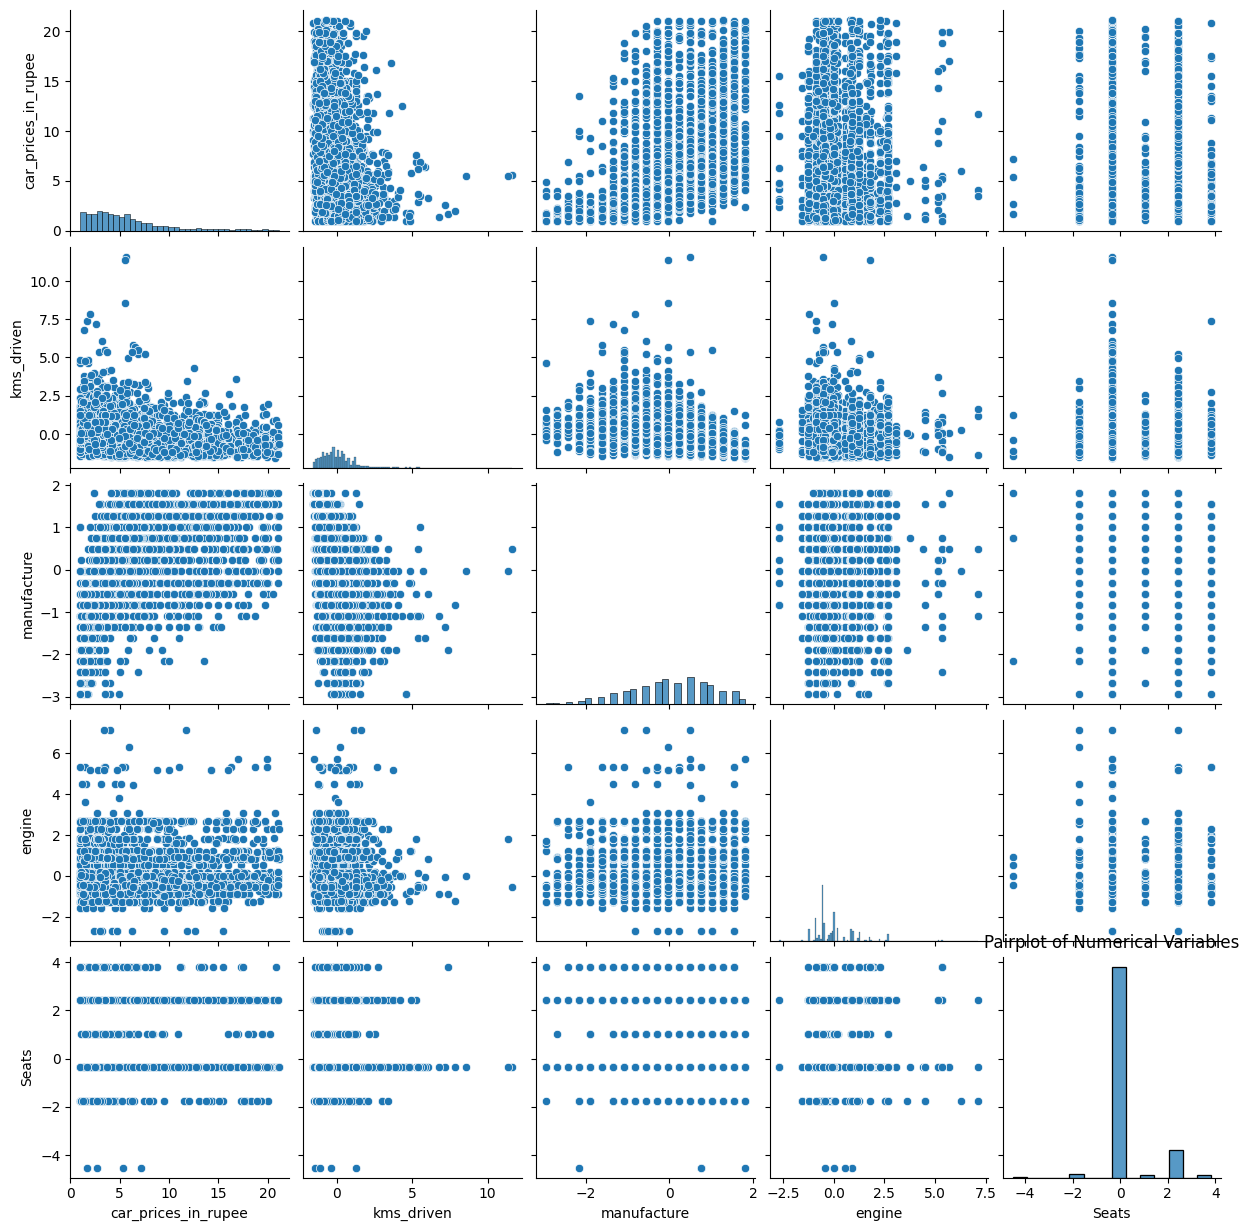

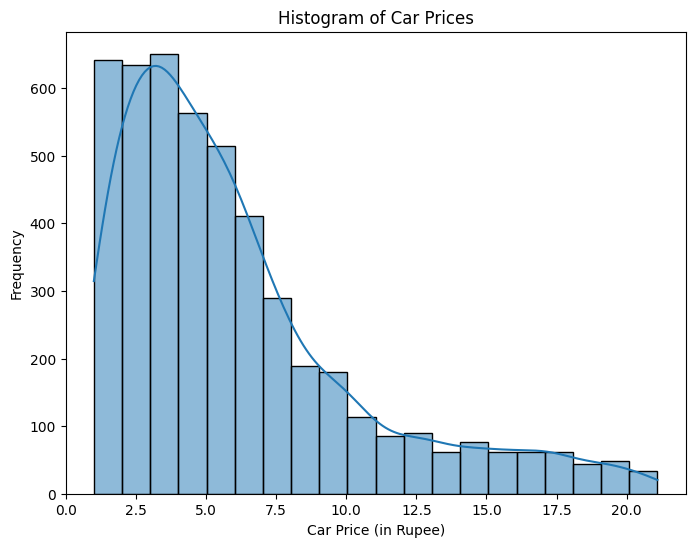

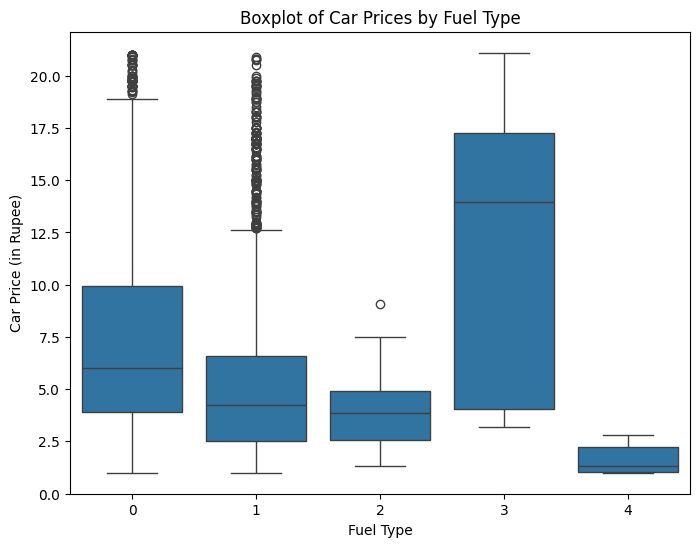

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("clean7_car_price.csv")

# Example visualizations
# Pairplot to visualize relationships between numerical variables
sns.pairplot(data[['car_prices_in_rupee', 'kms_driven', 'manufacture', 'engine', 'Seats']])
plt.title("Pairplot of Numerical Variables")
plt.show()

# Histogram of car prices
plt.figure(figsize=(8, 6))
sns.histplot(data['car_prices_in_rupee'], bins=20, kde=True)
plt.title("Histogram of Car Prices")
plt.xlabel("Car Price (in Rupee)")
plt.ylabel("Frequency")
plt.show()

# Boxplot of car prices by fuel type
plt.figure(figsize=(8, 6))
sns.boxplot(x='fuel_type', y='car_prices_in_rupee', data=data)
plt.title("Boxplot of Car Prices by Fuel Type")
plt.xlabel("Fuel Type")
plt.ylabel("Car Price (in Rupee)")
plt.show()


In [23]:
data.head()

,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats,zscore
0,Jeep Compass 2.0 Longitude Option BSIV,10.03,0.468244,0,1,1,0.485874,0.829074,-0.348423,-0.083515
1,Renault Duster RXZ Turbo CVT,12.83,-1.246126,1,0,1,1.539752,-0.296682,-0.348423,0.058409
2,Toyota Camry 2.5 G,16.40,-0.139789,1,0,1,0.222405,1.796576,-0.348423,0.239361
3,Volkswagen Polo 1.2 MPI Highline,5.15,0.073303,1,1,1,0.222405,-0.532264,-0.348423,-0.330867
4,Volkswagen Vento 1.2 TSI Highline AT,7.66,-0.389364,1,0,1,0.485874,-0.535860,-0.348423,-0.203643


In [24]:
import pandas as pd

# Load the dataset
data = pd.read_csv("clean7_car_price.csv")

# Define a threshold for z-score (e.g., 3)
threshold = 3

# Remove rows with z-score greater than the threshold
data_cleaned = data[(data['zscore'] < threshold) & (data['zscore'] > -threshold)]

# Print the shape of the cleaned dataset
print("Original Shape:", data.shape)
print("Shape after removing outliers:", data_cleaned.shape)


Original Shape: (4812, 10)
Shape after removing outliers: (4812, 10)


In [35]:
import pandas as pd

# Load the dataset
data = pd.read_csv("clean7_car_price.csv")

# Define a function to remove outliers using IQR method
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Specify columns for which you want to remove outliers
columns_with_outliers = ['car_prices_in_rupee','kms_driven','fuel_type','transmission','ownership','manufacture','engine','Seats']  # Adjust as needed

# Remove outliers for each specified column
for column in columns_with_outliers:
    data = remove_outliers_iqr(data, column)

# Print the shape of the cleaned dataset
print("Original Shape:", data.shape)
data_cleaned.to_csv("clean8_car_price.csv", index=False)



Original Shape: (2803, 10)


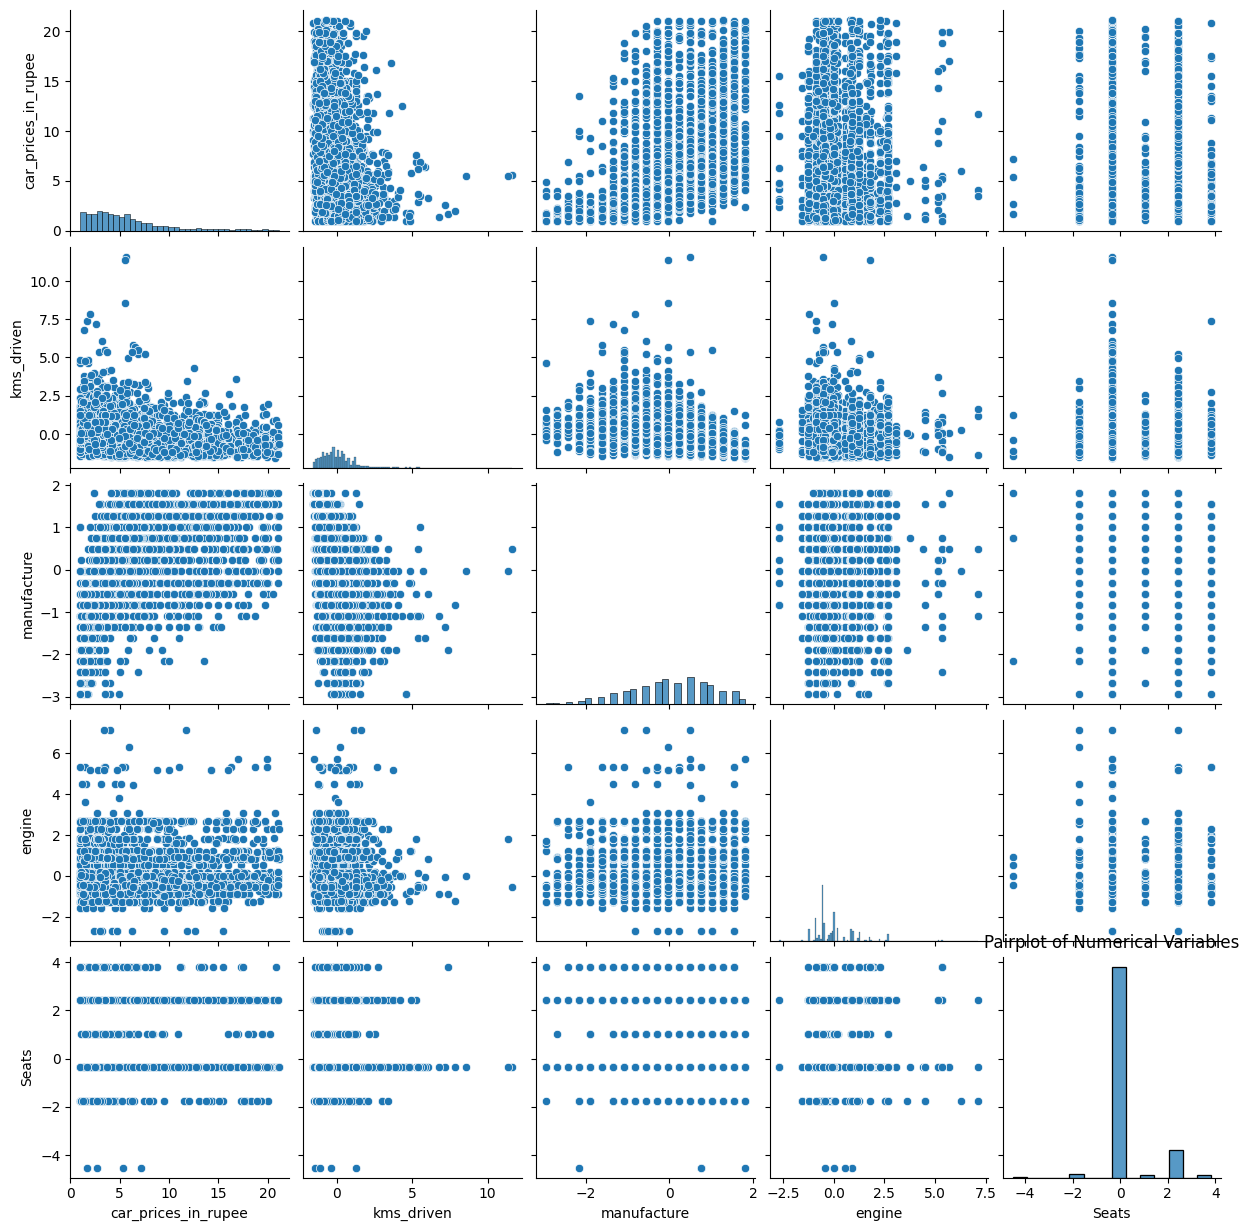

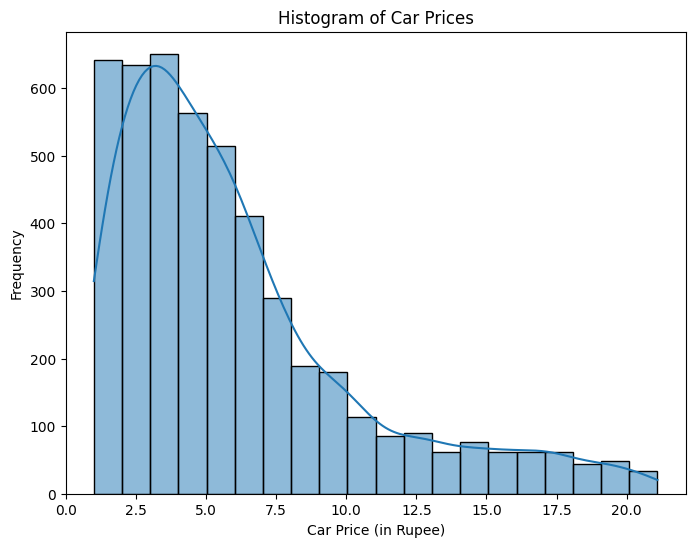

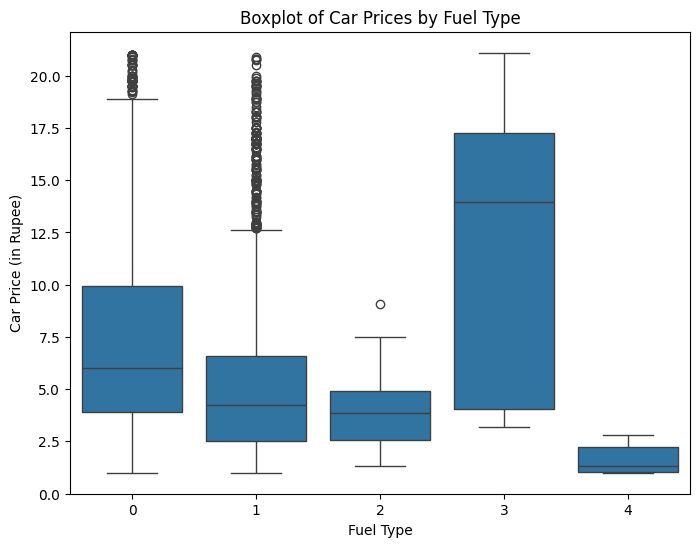

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("clean8_car_price.csv")

# Example visualizations
# Pairplot to visualize relationships between numerical variables
sns.pairplot(data[['car_prices_in_rupee', 'kms_driven', 'manufacture', 'engine', 'Seats']])
plt.title("Pairplot of Numerical Variables")
plt.show()

# Histogram of car prices
plt.figure(figsize=(8, 6))
sns.histplot(data['car_prices_in_rupee'], bins=20, kde=True)
plt.title("Histogram of Car Prices")
plt.xlabel("Car Price (in Rupee)")
plt.ylabel("Frequency")
plt.show()

# Boxplot of car prices by fuel type
plt.figure(figsize=(8, 6))
sns.boxplot(x='fuel_type', y='car_prices_in_rupee', data=data)
plt.title("Boxplot of Car Prices by Fuel Type")
plt.xlabel("Fuel Type")
plt.ylabel("Car Price (in Rupee)")
plt.show()


In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, VotingRegressor

# Load your dataset
# Assuming your dataset is stored in a DataFrame called 'data'
# You may need to adjust this part based on how you load your data
data = pd.read_csv("./self/clean6_car_price.csv")

# Perform train-test split
X = data.drop(columns=["car_prices_in_rupee", "car_name",'zscore'])  # Assuming these are the features
y = data["car_prices_in_rupee"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Engineering
# You can implement your feature engineering steps here

# Hyperparameter Tuning for XGBoost
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb_model = XGBRegressor(random_state=42)
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get best parameters and best model
best_params = grid_search.best_params_
best_xgb_model = grid_search.best_estimator_

# Random Forest Regression (for Ensemble)
rf_model = RandomForestRegressor(random_state=42)

# Ensemble Methods (Voting Regressor)
ensemble_model = VotingRegressor([('xgb', best_xgb_model), ('rf', rf_model)], n_jobs=-1)
ensemble_model.fit(X_train, y_train)

# Make predictions
y_pred_ensemble = ensemble_model.predict(X_test)

# Evaluate the ensemble model
mse_ensemble = mean_squared_error(y_test, y_pred_ensemble)
r2_ensemble = r2_score(y_test, y_pred_ensemble)
print("Ensemble Model - Mean Squared Error:", mse_ensemble)
print("Ensemble Model - R^2 Score:", r2_ensemble)



Ensemble Model - Mean Squared Error: 6.679075181494375
Ensemble Model - R^2 Score: 0.6538750312848538


In [38]:
data.head()

,Unnamed: 0,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats,zscore
0,0,Jeep Compass 2.0 Longitude Option BSIV,10.03,86226.0,0,1,1,2017.0,1956.0,5.0,-0.083515
1,1,Renault Duster RXZ Turbo CVT,12.83,13248.0,1,0,1,2021.0,1330.0,5.0,0.058409
2,2,Toyota Camry 2.5 G,16.40,60343.0,1,0,1,2016.0,2494.0,5.0,0.239361
3,4,Volkswagen Polo 1.2 MPI Highline,5.15,69414.0,1,1,1,2016.0,1199.0,5.0,-0.330867
4,5,Volkswagen Vento 1.2 TSI Highline AT,7.66,49719.0,1,0,1,2017.0,1197.0,5.0,-0.203643


In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, VotingRegressor

# Load your dataset
# Assuming your dataset is stored in a DataFrame called 'data'
# You may need to adjust this part based on how you load your data
data = pd.read_csv("./self/clean6_car_price.csv")

# Perform train-test split
X = data.drop(columns=["car_prices_in_rupee", "car_name","zscore"])  # Assuming these are the features
y = data["car_prices_in_rupee"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Engineering
# You can implement your feature engineering steps here

# Hyperparameter Tuning for XGBoost
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb_model = XGBRegressor(random_state=42)
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get best parameters and best model
best_params = grid_search.best_params_
best_xgb_model = grid_search.best_estimator_

# Random Forest Regression (for Ensemble)
rf_model = RandomForestRegressor(random_state=42)

# Ensemble Methods (Voting Regressor)
ensemble_model = VotingRegressor([('xgb', best_xgb_model), ('rf', rf_model)], n_jobs=-1)
ensemble_model.fit(X_train, y_train)

# Make predictions
y_pred_ensemble = ensemble_model.predict(X_test)

# Evaluate the ensemble model
mse_ensemble = mean_squared_error(y_test, y_pred_ensemble)
r2_ensemble = r2_score(y_test, y_pred_ensemble)
print("Ensemble Model - Mean Squared Error:", mse_ensemble)
print("Ensemble Model - R^2 Score:", r2_ensemble)



Ensemble Model - Mean Squared Error: 6.679075181494375
Ensemble Model - R^2 Score: 0.6538750312848538


In [40]:
import numpy as np

# Define a tolerance level (e.g., ±8% of the actual price)
tolerance = 0.5

# Calculate the absolute percentage error for each prediction
absolute_percentage_error = np.abs(y_pred_svr - y_test) / y_test

# Calculate the percentage of predictions within the tolerance
percentage_within_tolerance = np.mean(absolute_percentage_error <= tolerance) * 100

print("Percentage of predictions within ±5=% of actual prices: {:.2f}%".format( percentage_within_tolerance))


Percentage of predictions within ±5=% of actual prices: 81.10%


In [41]:
import numpy as np

# Define a tolerance level (e.g., ±8% of the actual price)
tolerance = 0.5

# Calculate the absolute percentage error for each prediction
absolute_percentage_error = np.abs(y_pred - y_test) / y_test

# Calculate the percentage of predictions within the tolerance
percentage_within_tolerance = np.mean(absolute_percentage_error <= tolerance) * 100

print("Percentage of predictions within ±5=% of actual prices: {:.2f}%".format( percentage_within_tolerance))


Percentage of predictions within ±5=% of actual prices: 72.17%


In [42]:
import numpy as np

# Define a tolerance level (e.g., ±8% of the actual price)
tolerance = 0.5

# Calculate the absolute percentage error for each prediction
absolute_percentage_error = np.abs(y_pred_ensemble - y_test) / y_test

# Calculate the percentage of predictions within the tolerance
percentage_within_tolerance = np.mean(absolute_percentage_error <= tolerance) * 100

print("Percentage of predictions within ±5=% of actual prices: {:.2f}%".format( percentage_within_tolerance))


Percentage of predictions within ±5=% of actual prices: 80.17%


In [43]:
import numpy as np

# Define a tolerance level (e.g., ±8% of the actual price)
tolerance = 0.5

# Calculate the absolute percentage error for each prediction
absolute_percentage_error = np.abs(y_pred_rf - y_test) / y_test

# Calculate the percentage of predictions within the tolerance
percentage_within_tolerance = np.mean(absolute_percentage_error <= tolerance) * 100

print("Percentage of predictions within ±5=% of actual prices: {:.2f}%".format( percentage_within_tolerance))


Percentage of predictions within ±5=% of actual prices: 77.57%


In [44]:
import numpy as np

# Define a tolerance level (e.g., ±8% of the actual price)
tolerance = 0.5

# Calculate the absolute percentage error for each prediction
absolute_percentage_error = np.abs(y_pred_rf_tuned - y_test) / y_test

# Calculate the percentage of predictions within the tolerance
percentage_within_tolerance = np.mean(absolute_percentage_error <= tolerance) * 100

print("Percentage of predictions within ±5=% of actual prices: {:.2f}%".format( percentage_within_tolerance))


Percentage of predictions within ±5=% of actual prices: 78.82%


In [45]:
import numpy as np

# Define a tolerance level (e.g., ±8% of the actual price)
tolerance = 0.5

# Calculate the absolute percentage error for each prediction
absolute_percentage_error = np.abs(y_pred_xgb - y_test) / y_test

# Calculate the percentage of predictions within the tolerance
percentage_within_tolerance = np.mean(absolute_percentage_error <= tolerance) * 100

print("Percentage of predictions within ±5=% of actual prices: {:.2f}%".format( percentage_within_tolerance))


Percentage of predictions within ±5=% of actual prices: 78.09%
